# Profitable app profiles for the App Store and Google Play Markets

## Introduction

We are doing an analysis for a complany that creates android and iOS apps. The main revenue source is ads, so more users and engagement is the main driver of our revenue.

What we aim to do with this analysis is determine what types of apps are likley to attract users, which in essence will lead us to the most profitable app types in the given marketplaces.

We hope this information will help our developers understand what direction to go with apps in the future.

## Opening and Exploring the Data

Since itd be costly and time consuming to collect app store data across multiple platforms, we look for sample datasets we can use. 

* The first [dataset](https://www.kaggle.com/lava18/google-play-store-apps) contains approximately 10,000 apps from Google Play; The data was collected in 2018

* The second dataset contains 7,000 apps from the App Store; The data was collected in 2017



In [3]:
#import Google Apps dataset
opened_file = open('googleplaystore.csv', encoding='utf-8')
from csv import reader
read_open_file = reader(opened_file)
google_data = list(read_open_file)

#import App Store dataset
opened_file = open('AppleStore.csv', encoding='utf-8')
read_open_file = reader(opened_file)
apple_data = list(read_open_file)

In [4]:
def explore_data(dataset, start, end, rows_and_columns = False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
        
    if rows_and_columns:
        print('Number of rows:', len(dataset[1:]))
        print('Number of columns:', len(dataset[0]))

In [5]:
#Explore the datasets using our explore function

explore_data(google_data, 0, 5, rows_and_columns = True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 10841
Number of columns: 13


In our google data sets we have 13 columns, and `App`, `Category`, `Rating`, `Reviews`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres` will be the useful ones for our analysis.

In [6]:
explore_data(apple_data, 0, 5, rows_and_columns = True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


Number of rows: 7197
Number of columns: 16


In our Apple dataset, we have 16 columns. A lot of these are not self explanatory so a [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) is a link to the documentation. One disappointing feature of this data, is that no `installs` column exists. This could be very useful for the analysis. But, `track_name`, `price`, `rating_count_tot`, `prime_genre`look promising.

## Deleting wrong data

From reading the discussion section of the Google Play data, we found there was an incorrect row. This was due to a missing entry for a column which seems to have shifted the data. Lets print the header and row, as well as a correct row to compare.

In [7]:
print(google_data[0]) #header
print(google_data[10472]) #correct row
print(google_data[10473]) #incorrect row


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Xposed Wi-Fi-Pwd', 'PERSONALIZATION', '3.5', '1042', '404k', '100,000+', 'Free', '0', 'Everyone', 'Personalization', 'August 5, 2014', '3.0.0', '4.0.3 and up']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In the above code we can see that the `Rating` column has a 19, but the maximum rating is a 5. We can also see a missing value, and overall the data seems to be incorrect. In the [discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) it was figured out that `Category` was missing a value, which caused some other errors

We will delete this row.

In [8]:
print(len(google_data))
del google_data[10473]
print(len(google_data))

10842
10841


## Removing duplicates

When we examine the google(android) app data, we see that there are quite a few duplicates.

In [9]:
google_dup_check = {}
for row in google_data[1:]:
    if row[0] in google_dup_check:
        google_dup_check[row[0]] += 1
    else:
        google_dup_check[row[0]] = 1

google_app_dups = len(google_dup_check.keys()) #How many duplicate apps
total_google_dups = sum(google_dup_check.values()) #How many total duplicate rows

print('Total amount of apps:', google_app_dups)
print('Total amount of rows:',total_google_dups)
print('Total rows in the dataset:', len(google_data[1:]))
print('Total duplicates we expect:',total_google_dups - google_app_dups)

Total amount of apps: 9659
Total amount of rows: 10840
Total rows in the dataset: 10840
Total duplicates we expect: 1181


In our dataset we are expecting one row per app. We looped through the data to check the amount of rows per app listed and came up with the above totals. We found that the total amount of duplicates are 1181. The total amount of unique apps are 9659, while our dataset length is 10840 (hence the total duplicates we expect)

In [10]:
print(google_dup_check['Instagram'])

4


In [11]:
for app in google_data[1:]:
    if app[0] == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


There seems to be an inconsitency with the `Reviews` column. Just to be clear, when we review the column meanings on the [dataset](https://www.kaggle.com/lava18/google-play-store-apps), the `Reviews` column indicates total amount of reviews. 

We could remove random rows in order to clean out the duplicates, but it seems with the varying but close numbers that the data was collected at different times throughout the day. This would mean that the highest amount of reviews is probably the most up to date data. So we will keep the entries with the most data, and delete the rest.


In [12]:
reviews_max = {}

for row in google_data[1:]:
    app_name = row[0]
    n_reviews = float(row[3])
    
    if app_name in reviews_max and reviews_max[app_name] < n_reviews:
        reviews_max[app_name] = n_reviews
    
    elif app_name not in reviews_max:
        reviews_max[app_name] = n_reviews
print(len(reviews_max))

9659


So we filtered through the data and collected out most up to date rows. I printed the length of the dictionary to confirm the correct amount of unique apps. We we want to use this dicionary to filter our data.

In [13]:
google_clean = []
already_added = []

for row in google_data[1:]:
    app_name = row[0]
    n_reviews = float(row[3])
    
    if n_reviews == reviews_max[app_name] and app_name not in already_added:
        google_clean.append(row)
        already_added.append(app_name)
        
print(len(google_clean))

9659


We loop through our original data in google_data, and compare each entry to our dictionary that has all of the most up to date entries. We keep the up to date entries and delete old ones. We then confirm the correct amount of rows: 9659

Lets check for duplicates in the app store data.

In [14]:
apple_data_dup_check = {}
for row in apple_data[1:]:
    id_app = row[0]
    
    if id_app in apple_data_dup_check:
        apple_data_dup_check[id_app] += 1
    else:
        apple_data_dup_check[id_app] = 1


check_apple = apple_data_dup_check.values()
duplicates = False
for i in check_apple:
    if i > 1 or i < 1:
        duplicates = True

print(duplicates)

False


## Removing Non-English Apps

After we see that there are no duplicates in the data, its time to move on to removing any non-english apps in our datasets.

In [15]:
def remove_non_english(string):
    counter = 0
    for letter in string:
        if ord(letter) > 127:
            counter += 1
    if counter > 3:
        return False
    else:
        return True

In [16]:
remove_non_english('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

Using our new function, we will filter out all of the non-english apps from both of our datasets.

In [17]:
#apple_data
#google_clean (no header row)
apple_data_eng = []
google_data_eng = []
for app in apple_data[1:]:
    tester = remove_non_english(app[1])
    if tester:
        apple_data_eng.append(app)

for app in google_clean:
    tester = remove_non_english(app[0])
    if tester:
        google_data_eng.append(app)

In [18]:
explore_data(google_data_eng, 0, 3, True)
print('\n')
explore_data(apple_data_eng, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9613
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

## Isolating the Free Apps

Our company in this scenario only builds free apps, so we still have one more step in the data cleaning process. We need to isolate the free apps.

In [19]:
#apple_data_eng [4] 
#google_data_eng [6]

apple_data_free = []
google_data_free = []

for app in apple_data_eng:
    price = float(app[4])
    
    if price == 0.0:
        apple_data_free.append(app)
        
for app in google_data_eng:
    price = app[6]
    
    if price == 'Free':
        google_data_free.append(app)

In [20]:
explore_data(google_data_free, 0, 3, True)
print('\n')
explore_data(apple_data_free, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 8862
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

After isolating our free apps, we do one last check to see of our number of rows are meeting expectations. Now we move on to the analysis.

## Analysis

**To minimize risks and overhead, our validation strategy for an app idea has three steps:**
> Build a minimal Android version of the app, and add it to Google Play.

> If the app has a good response from users, we develop it further.

> If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.


## Most Common Apps by Genre

First lets determine the most common genres to get us started.

In [21]:
def freq_table(dataset, index):
    # count / total .68 * 100 = 68
    freq_dict = {}
    total = 0
    
    for i in dataset:
        total += 1
        if i[index] in freq_dict:
            freq_dict[i[index]] += 1
        else:
            freq_dict[i[index]] = 1
        
    percent_dict = {}
    for key,value in freq_dict.items():
        percent_dict[key] = (value / total) * 100
        
    return percent_dict

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    
    table_sorted = sorted(table_display, reverse = True)
    
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

In [22]:
print(display_table(apple_data_free, -5)) #prime_genre

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665
None


In [23]:
display_table(google_data_free, 1) #category

FAMILY : 18.898792733837304
GAME : 9.725826469592688
TOOLS : 8.462146000225657
BUSINESS : 4.592124562789123
LIFESTYLE : 3.9038700214374367
PRODUCTIVITY : 3.8925871601038025
FINANCE : 3.7007785174320205
MEDICAL : 3.5315355974275078
SPORTS : 3.396141261423897
PERSONALIZATION : 3.317161232088458
COMMUNICATION : 3.2381812027530184
HEALTH_AND_FITNESS : 3.0802211440821394
PHOTOGRAPHY : 2.944826808078529
NEWS_AND_MAGAZINES : 2.798149610741284
SOCIAL : 2.6627552747376737
TRAVEL_AND_LOCAL : 2.335552296062281
SHOPPING : 2.245289405393208
BOOKS_AND_REFERENCE : 2.1437436533904997
DATING : 1.8616721200496444
VIDEO_PLAYERS : 1.7939749520478394
MAPS_AND_NAVIGATION : 1.399074805370642
FOOD_AND_DRINK : 1.241114746699763
EDUCATION : 1.1621347173643235
ENTERTAINMENT : 0.9590432133589079
LIBRARIES_AND_DEMO : 0.9364774906916393
AUTO_AND_VEHICLES : 0.9251946293580051
HOUSE_AND_HOME : 0.8236488773552973
WEATHER : 0.8010831546880289
EVENTS : 0.7108202640189552
PARENTING : 0.6544059573507841
ART_AND_DESIGN : 0

In [24]:
display_table(google_data_free, -4) #genres

Tools : 8.450863138892023
Entertainment : 6.070179397495204
Education : 5.348076272142616
Business : 4.592124562789123
Productivity : 3.8925871601038025
Lifestyle : 3.8925871601038025
Finance : 3.7007785174320205
Medical : 3.5315355974275078
Sports : 3.463838429425702
Personalization : 3.317161232088458
Communication : 3.2381812027530184
Action : 3.102786866749408
Health & Fitness : 3.0802211440821394
Photography : 2.944826808078529
News & Magazines : 2.798149610741284
Social : 2.6627552747376737
Travel & Local : 2.324269434728647
Shopping : 2.245289405393208
Books & Reference : 2.1437436533904997
Simulation : 2.042197901387792
Dating : 1.8616721200496444
Arcade : 1.8503892587160102
Video Players & Editors : 1.771409229380571
Casual : 1.7601263680469368
Maps & Navigation : 1.399074805370642
Food & Drink : 1.241114746699763
Puzzle : 1.128286133363421
Racing : 0.9928917973598104
Role Playing : 0.9364774906916393
Libraries & Demo : 0.9364774906916393
Auto & Vehicles : 0.9251946293580051
S

The immediate finding of these frequency tables are the spread of the apps downloaded. The google marketplace is much more evenly spread out, whereas the app store has a very heavy focus on game apps. This provides and interesting problem being that we want to develop an app(s) for both platforms. Entertainment is probably the next closest in popularity.

The google marketplace also is very clearly covering more 'bases' per se, in someones everyday life, wheras the appstore is heavy in games and entertainment.

## Most Popular Apps by Genre on the App Store

Now we are going to find what genres are most popular by calculating the total number of installs per genre. The App store doesnt have this data though, so we will use user_ratings as a proxy

In [25]:
genre = freq_table(apple_data_free, -5)
apple_data_avgs = {}
for i in genre:
    total = 0
    len_genre = 0
    
    for j in apple_data_free:
        genre_app = j[-5]
        
        if genre_app == i:
            n_ratings = float(j[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    apple_data_avgs[i] = avg_n_ratings    

apple_sort = sorted(apple_data_avgs.items(), key=lambda x: x[1])
for i in apple_sort:
    print(i[0], ':', i[1])

Medical : 612.0
Catalogs : 4004.0
Education : 7003.983050847458
Business : 7491.117647058823
Entertainment : 14029.830708661417
Lifestyle : 16485.764705882353
Utilities : 18684.456790123455
Productivity : 21028.410714285714
News : 21248.023255813954
Games : 22788.6696905016
Sports : 23008.898550724636
Health & Fitness : 23298.015384615384
Shopping : 26919.690476190477
Travel : 28243.8
Photo & Video : 28441.54375
Finance : 31467.944444444445
Food & Drink : 33333.92307692308
Book : 39758.5
Weather : 52279.892857142855
Music : 57326.530303030304
Social Networking : 71548.34905660378
Reference : 74942.11111111111
Navigation : 86090.33333333333


Since we are gunning for downloads and engagement, games still looks like a good option here. There are still decent numbers for installs, and it shows great popularity. Music, Entertainment, and Navigation all look high, but when we think of these categories they are completely dominated by certain apps and companies. The games category allows us a way in that isnt so competitive, and can allow for growth.

## Most Popular Apps by Genre on Google Play

Lets look at google

In [26]:
display_table(google_data_free, 5) #the Installs columns

1,000,000+ : 15.728308699086089
100,000+ : 11.55365000564143
10,000,000+ : 10.549475346947986
10,000+ : 10.199706645605326
1,000+ : 8.394448832223853
100+ : 6.916393997517771
5,000,000+ : 6.826131106848697
500,000+ : 5.562450637481666
50,000+ : 4.772650344127271
5,000+ : 4.513144533453684
10+ : 3.542818458761142
500+ : 3.2494640640866526
50,000,000+ : 2.3017037120613786
100,000,000+ : 2.1324607920568655
50+ : 1.9180864267178157
5+ : 0.7898002933543946
1+ : 0.5077287600135394
500,000,000+ : 0.270788672007221
1,000,000,000+ : 0.2256572266726842
0+ : 0.045131445334536835


We can see app download frequencies in 'categories' ranging from 1,000,000 to 0. Lets calculate the average number of app installs per app genre based on the string data provided.

MEDICAL : 120550.61980830671
EVENTS : 253542.22222222222
BEAUTY : 513151.88679245283
PARENTING : 542603.6206896552
LIBRARIES_AND_DEMO : 638503.734939759
AUTO_AND_VEHICLES : 647317.8170731707
COMICS : 817657.2727272727
DATING : 854028.8303030303
HOUSE_AND_HOME : 1331540.5616438356
FINANCE : 1387692.475609756
LIFESTYLE : 1437816.2687861272
BUSINESS : 1712290.1474201474
EDUCATION : 1833495.145631068
FOOD_AND_DRINK : 1924897.7363636363
ART_AND_DESIGN : 1986335.0877192982
SPORTS : 3638640.1428571427
FAMILY : 3697848.1731343283
MAPS_AND_NAVIGATION : 4056941.7741935486
HEALTH_AND_FITNESS : 4188821.9853479853
WEATHER : 5074486.197183099
PERSONALIZATION : 5201482.6122448975
SHOPPING : 7036877.311557789
BOOKS_AND_REFERENCE : 8767811.894736841
NEWS_AND_MAGAZINES : 9549178.467741935
TOOLS : 10801391.298666667
ENTERTAINMENT : 11640705.88235294
TRAVEL_AND_LOCAL : 13984077.710144928
GAME : 15588015.603248259
PRODUCTIVITY : 16787331.344927534
PHOTOGRAPHY : 17840110.40229885
SOCIAL : 23253652.127118643

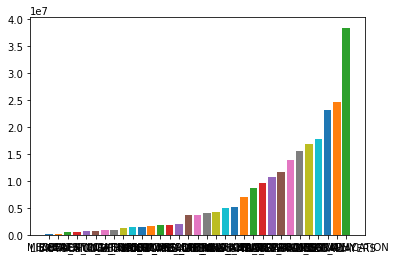

In [29]:
import matplotlib.pyplot as plt
cat_goog = freq_table(google_data_free, 1) #category data for unique key values - to make nested for loops
avg_installs_d = {}
for app in cat_goog:
    total = 0
    len_category = 0
    for genre in google_data_free:
        category_app = genre[1]
        
        if category_app == app:
            n_installs = genre[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')

            total += float(n_installs)
            len_category += 1
    avg_installs = total / len_category
    avg_installs_d[app] = avg_installs

avg_installs_sort = sorted(avg_installs_d.items(), key=lambda x: x[1])
for i in avg_installs_sort:
    print(i[0], ':', i[1])
    plt.bar(i[0], i[1])

Games here are sitting as the 6th highest value, which strengthens the game reccomendation for me. There are many possible avenues to take depending on the teams strengths. But there is another interesting data point here.


The google marketplace has a more spread out and broad range of apps being downloaded, and a lot of those are for daily life. In this category column, we can see productivity apps rank one spot higher than games. So an app on the google marketplace around productivity could be good as well!

## Conclusions

In this project ive tried to give a recommendation for a dev team to try to find a profitable app to develop for both marketplaces. Because of the flexibility, and popularity of games, I see creating a game app would be a good path foward. Productivity apps could also be a great possibility, but the app store shows much less interest in this than the google marketplace

I made this reccomendation becuase the most popular and downloaded apps are social media, or navigation. Since these apps have such a strong hold on audiences already, itd be difficult to see profitabi